# term1 sprint7 クラスタリング

### クラスタリングのための人工データセット
クラスタリングを実験するための人工データセットを作成するコードを用意しています。


このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。

In [203]:
# 《シンプルデータセット3》
from sklearn.datasets import make_blobs
#X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.8, shuffle=True, random_state=0)

In [204]:
import numpy as np
import matplotlib.pyplot as plt

## 【問題1】中心点の初期値を決める
入力されたデータから $K$ 個の中心点 $\mu_1$ から $\mu_K$ の初期値を決めるコードを作成してください。$K$ は指定したクラスタ数です。


最もシンプルな初期値の決定方法は、データ点 $X_n$ の中からランダムに $K$ 個選ぶことです。今回はこれを実装してください。


K-meansの学習結果は中心点 $\mu$ の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

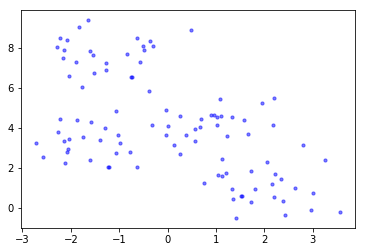

In [205]:
#可視化
plt.scatter(X[:,0],X[:,1],c="b",s=10,alpha=0.5)
plt.show()

In [206]:
K = 4
X_size,n_features = X.shape
# ランダムに重心の初期値を初期化
centroids  = X[np.random.choice(X_size,K)]
centroids

array([[-2.04842805,  6.59964314],
       [ 2.1567972 ,  1.21925515],
       [ 1.09150494,  5.46720613],
       [-0.73615055,  6.54189518]])

## 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する $r_{nk}$ と $\mu_k$ を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。
$$
SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2
$$
$n$ : データ点のインデックス


$k$ : クラスタのインデックス


$X_n$ : $n$番目のデータ点


$\mu_k$ : $k$番目の中心点


$r_{nk}$ : データ点$X_n$がクラスタ$k$に所属していたら1、そうでなければ0

In [45]:
# 各データ所属クラスタ番号を保存する配列を用意
cluster = np.zeros(X_size)
# 前の重心と比較するために、仮に新しい重心を入れておく配列を用意
new_centroids = np.zeros((K, n_features))
#クラスタごとのsseを格納する配列を用意
sse = np.zeros(K)

for i in range(X_size):
    distances = np.sum((X[i] - centroids) ** 2, axis=1)
    # データの所属クラスタを距離の一番近い重心を持つものに更新
    cluster[i] = np.argsort(distances)[0]

# すべてのクラスタに対して重心を再計算
for j in range(K):
    new_centroids[j] = X[cluster==j].mean(axis=0)
# sseの計算    
for j in range(K):
    sse[j] = np.sum((X[cluster==j] - new_centroids[j])**2)
sse_sum = np.sum(sse)
sse_sum

263.9131397690047

## クラスタの割り当てと中心点の移動を繰り返す
K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。


中心点 $\mu_k$ を固定した上で $SSE$ を最小化する クラスタの割り当て $r_{nk}$ を選ぶ。
クラスタの割り当て $r_{nk}$ を固定した上で $SSE$ を最小化する 中心点 $\mu_k$ を選ぶ。

最初の中心点 $\mu_k$ は問題1で作成した初期値です。


順番に見ていきます。

## 【問題3】クラスタへの割り当て
全てのデータ点 $X_n$ を最も近い中心点 $\mu_k$ に割り当てるコードを作成してください。


K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル $p,q$ に対しては以下の数式で表現できます。

$$
\|q-p\| = \sqrt{(q-p)\cdot(q-p)}
$$

NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。


numpy.linalg.norm — NumPy v1.17 Manual


中心点 $\mu_k$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [72]:
# 各データ所属クラスタ番号を保存する配列を用意
cluster = np.zeros(X_size)
# 前の重心と比較するために、仮に新しい重心を入れておく配列を用意
new_centroids = np.zeros((K, n_features))

for i in range(X_size):
    distances = np.sum((X[i] - centroids) ** 2, axis=1)
    # ノルムで計算バージョン
    # ルートしたものと結果が同じになることを確認した
    norm = np.linalg.norm(X[i] - centroids, axis=1)
    #print("np.sqrt(distances)", np.sqrt(distances))
    #print("norm", norm)
    #print("np.argsort(distances)", np.argsort(norm))
    
    # データの所属クラスタを距離の一番近い重心を持つものに更新
    cluster[i] = np.argsort(distances)[0]
    #print("cluster[i]", cluster[i])

In [74]:
# 回す回数を減らした版
norms = np.zeros(X_size*K)
norms = norms.reshape(X_size, K)
for i in range(K):
    norms[:,i] = np.linalg.norm(X - centroids[i], axis=1)
#print("norms", norms)
#print("min", np.amin(norms, axis=1))
cluster = np.argsort(norms, axis=1)[:,0]
cluster

array([3, 0, 3, 3, 3, 3, 1, 0, 3, 0, 2, 2, 2, 0, 2, 3, 3, 3, 1, 3, 3, 0,
       1, 1, 3, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1, 3, 0, 3, 0, 1, 3, 1, 2, 1,
       1, 0, 1, 1, 3, 3, 3, 3, 1, 1, 1, 2, 0, 3, 3, 0, 2, 3, 3, 3, 3, 0,
       1, 1, 3, 3, 0, 3, 3, 0, 3, 3, 1, 1, 3, 1, 1, 0, 1, 3, 1, 1, 1, 1,
       3, 3, 3, 1, 3, 1, 1, 0, 0, 1, 0, 3])

## 【問題4】中心点の移動
中心点 $\mu_k$ を $k$ 番目のクラスタに割り当てられる全てのデータ点 $X_n$ の平均値（重心）に移動するコードを作成してください。


クラスタの割り当て $r_{nk}$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [50]:
# すべてのクラスタに対して重心を再計算
for j in range(K):
    new_centroids[j] = X[cluster==j].mean(axis=0)

## 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。

- 繰り返しが指定した回数に到達する。（雛形では引数max_iter）
- 中心点 $\mu_k$ と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）


In [272]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters=3, n_init=1, max_iter=10, tol=0, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        X_size,n_features = X.shape
        # best sseを入れておく
        self.best_sse = None
        self.best_centroids = None
        self.best_cluster = None
        # 問6
        for k in range(self.n_init):
            # ランダムに重心の初期値を初期化
            self.centroids  = X[np.random.choice(X_size,self.n_clusters)]
            # 各データ所属クラスタ番号を保存する配列を用意
            self.cluster = np.zeros(X_size)
            # 前の重心と比較するために、仮に新しい重心を入れておく配列を用意
            new_centroids = np.zeros((self.n_clusters, n_features))
            # 各クラスタの中心までの距離を入れておく行列
            self.norms = np.zeros(X.shape[0]*self.n_clusters)
            self.norms = self.norms.reshape(X.shape[0], self.n_clusters)
        
            # 問5
            for i in range(self.max_iter):
                if self.verbose:
                    #verboseをTrueにした際は学習過程を出力
                    self.plot_sc(X, i)

                # データの所属クラスタを距離の一番近い重心を持つものに更新
                #self.predict(X)
                for j in range(self.n_clusters):
                    # 各クラスタの中心との距離を求める
                    self.norms[:,j] = np.linalg.norm(X - self.centroids[j], axis=1)
                #print("self.norms[0]", self.norms[0])
                # データの所属クラスタを距離の一番近い重心を持つものに更新
                self.cluster = np.argsort(self.norms, axis=1)[:,0]
                #print("self.cluster[0]" , self.cluster[0])

                # すべてのクラスタに対して重心を再計算
                for j in range(self.n_clusters):
                    new_centroids[j] = X[self.cluster==j].mean(axis=0)
                    #print("new_centroids[j]", new_centroids[j])
                    #print("X[self.cluster==j]", X[self.cluster==j])

                # 重心が更新されなければ抜ける
                if np.sum(np.linalg.norm(new_centroids - self.centroids, axis=1)) <= self.tol:
                    break

                self.centroids =  new_centroids.copy()
            
            # 最後にsseを計算
            sse = self._sse_func(X)
            # bestで更新
            if self.best_sse == None or self.best_sse > sse:
                self.best_sse = sse
                self.best_centroids = self.centroids.copy()
                self.best_cluster = self.cluster.copy()
            
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("iter : ", i)
                print("sse : ", sse)
                print("self.cluster : ", self.cluster)
                print("self.best_sse : ", self.best_sse)
        
        return self.best_cluster
        
        
            
    def _sse_func(self, X):
        #クラスタごとのsseを格納する配列を用意
        sse = np.zeros(self.n_clusters)
        # sseの計算    
        for j in range(self.n_clusters):
            sse[j] = np.sum((X[self.cluster==j] - self.centroids[j])**2)
        
        return np.sum(sse)
        
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        for j in range(self.n_clusters):
            # 各クラスタのbest中心との距離を求める
            self.norms[:,j] = np.linalg.norm(X - self.best_centroids[j], axis=1)
        # 一番近いクラスタ番号を返す
        return np.argsort(self.norms, axis=1)[:,0]
        
        
    def plot_sc(self, X, num):
        #可視化
        col = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        for i in range(self.n_clusters):
            idx = np.where(self.cluster == i)
            ax.scatter(X[idx, 0], X[idx, 1], s=10, alpha=0.5, c=col[i], label=i)
            ax.scatter(self.centroids[i][0], self.centroids[i][1], s=50, alpha=1.0, c=col[i], marker="*")
        #ax.scatter(X[0, 0], X[0, 1], s=50, alpha=0.5, c=col[i], marker="*")
        ax.legend(loc='upper left')
        ax.set_title("{}:time".format(num))
        fig.show()
        

self.centroids [[ 0.13742771  3.16777298]
 [ 0.69794036  4.4288665 ]
 [-1.74130671  3.55984738]]
iter :  6
sse :  203.19637718510023


/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


array([2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1,
       2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2])

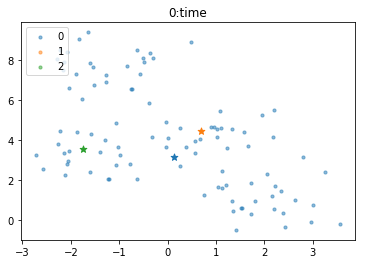

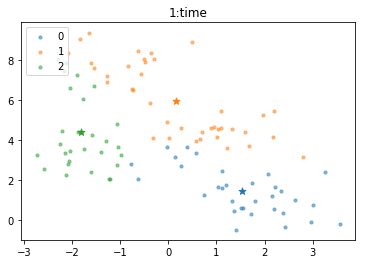

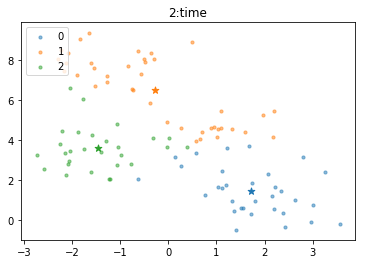

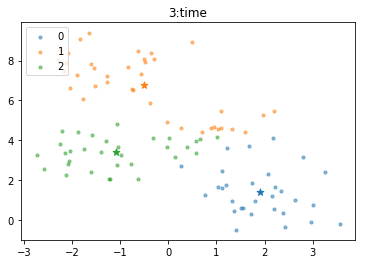

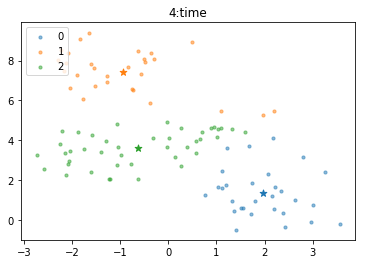

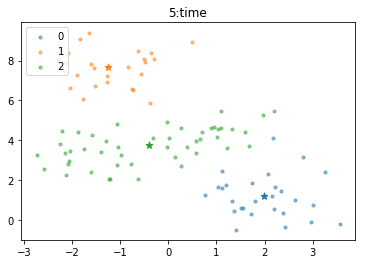

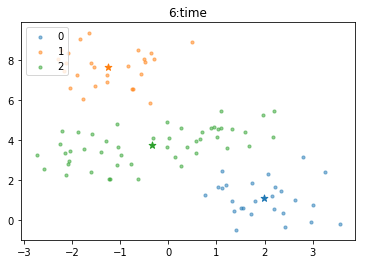

In [267]:
skm_1 = ScratchKMeans(n_clusters=3, n_init=1, max_iter=15, verbose=True)
skm_1.fit(X)

## 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 $\mu_k$ を保持しておきます。

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


iter :  4
sse :  178.99007600407342
self.cluster :  [2 4 2 2 2 2 2 3 1 4 1 1 1 3 3 0 0 2 2 0 0 4 2 0 2 2 2 2 0 0 0 1 0 0 2 2 4
 0 3 2 2 2 1 2 2 4 0 2 2 2 2 0 2 2 2 1 3 0 0 3 1 0 0 2 0 3 2 2 0 2 4 0 2 4
 2 2 2 2 0 0 0 4 2 2 0 2 0 0 2 2 2 2 2 2 2 4 1 2 3 2]
self.best_sse :  178.99007600407342
iter :  6
sse :  104.02874605299866
self.cluster :  [2 4 2 2 2 2 1 4 4 4 4 4 4 4 4 3 0 2 1 3 2 4 1 3 2 1 2 2 3 3 3 4 3 0 1 2 4
 0 4 1 2 1 4 1 1 4 3 1 2 0 2 3 1 1 0 4 4 3 3 4 4 0 3 2 0 4 1 1 3 2 4 0 2 4
 2 2 2 1 3 0 3 4 1 2 3 1 3 3 2 2 2 1 0 1 1 4 4 1 4 1]
self.best_sse :  104.02874605299866
iter :  4
sse :  102.29236075108072
self.cluster :  [3 0 3 3 3 3 1 0 4 0 4 4 4 0 4 2 2 3 1 2 2 0 1 2 3 1 3 3 2 2 2 4 2 2 1 3 0
 2 0 1 3 1 4 1 1 0 2 1 3 3 3 2 1 1 1 4 0 2 2 0 4 2 2 3 2 0 1 1 2 3 0 2 3 0
 3 3 3 1 2 2 2 0 1 3 2 1 2 2 3 3 3 1 3 1 1 0 4 1 0 4]
self.best_sse :  102.29236075108072


array([3, 0, 3, 3, 3, 3, 1, 0, 4, 0, 4, 4, 4, 0, 4, 2, 2, 3, 1, 2, 2, 0,
       1, 2, 3, 1, 3, 3, 2, 2, 2, 4, 2, 2, 1, 3, 0, 2, 0, 1, 3, 1, 4, 1,
       1, 0, 2, 1, 3, 3, 3, 2, 1, 1, 1, 4, 0, 2, 2, 0, 4, 2, 2, 3, 2, 0,
       1, 1, 2, 3, 0, 2, 3, 0, 3, 3, 3, 1, 2, 2, 2, 0, 1, 3, 2, 1, 2, 2,
       3, 3, 3, 1, 3, 1, 1, 0, 4, 1, 0, 4])

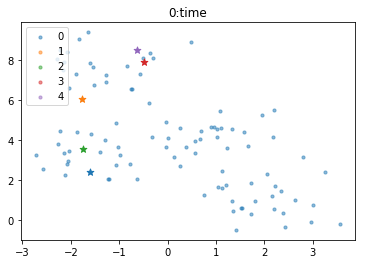

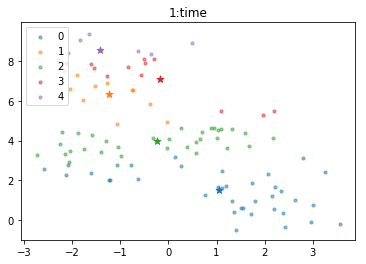

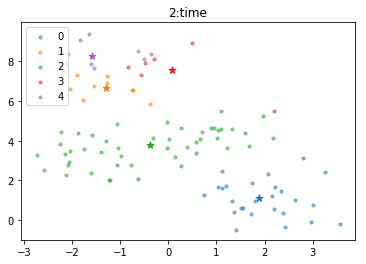

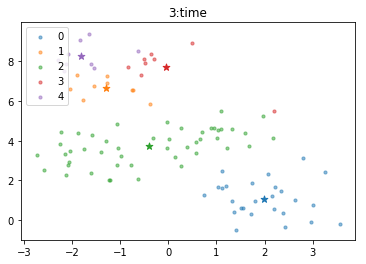

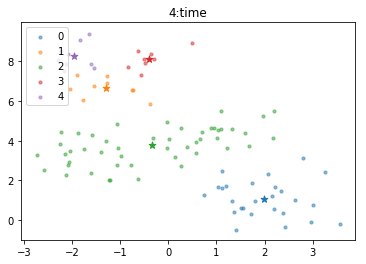

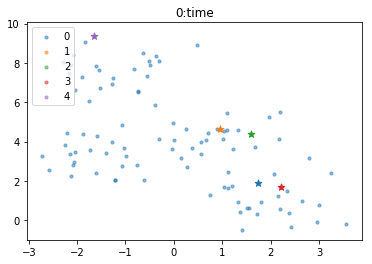

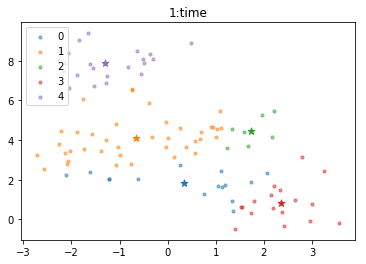

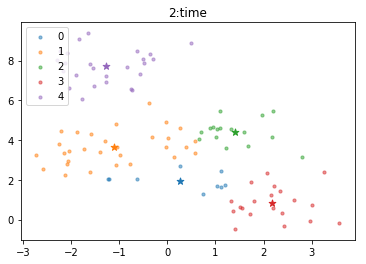

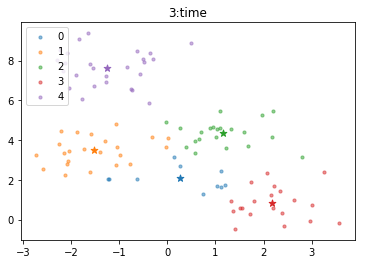

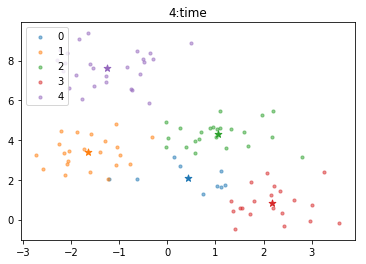

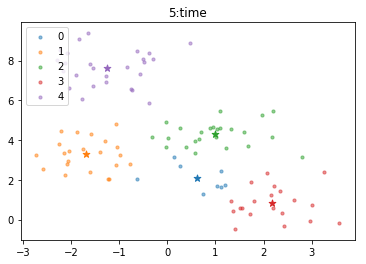

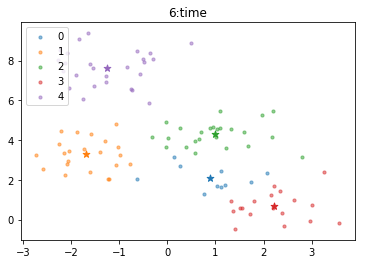

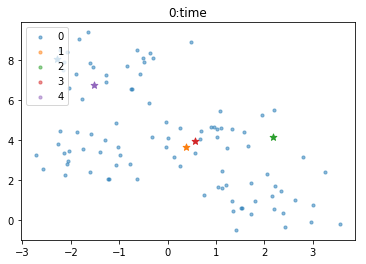

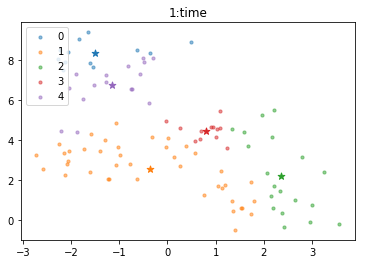

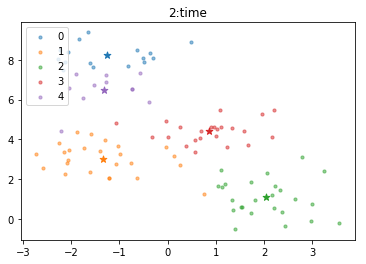

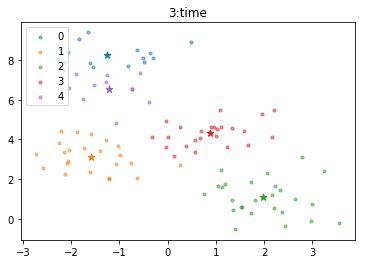

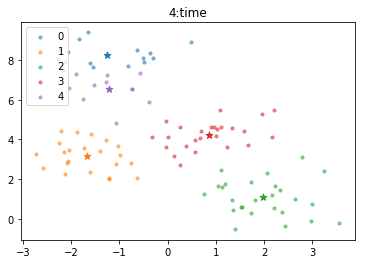

In [277]:
skm_2 = ScratchKMeans(n_clusters=5, n_init=3, max_iter=15, verbose=True)
skm_2.fit(X)

## 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


データ点 $X_n$ と学習で決まった中心点 $\mu_k$ に対し、 $SSE$ を最小化する $r_{nk}$ を選ぶ。

具体的には次のことです。


データ点 $X_n$ を最も近い $\mu_k$ に割り当てる。

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


iter :  8
sse :  105.2629846595603
self.cluster :  [0 1 2 2 2 2 4 1 1 1 1 1 1 1 1 3 0 0 4 3 2 1 4 3 2 4 0 2 3 3 3 1 3 3 4 2 1
 3 1 4 2 4 1 4 4 1 3 4 2 0 2 3 0 4 0 1 1 3 3 1 1 3 3 2 3 1 4 0 3 2 1 3 2 1
 2 2 0 4 3 3 3 1 4 0 3 0 3 3 2 2 2 0 0 0 4 1 1 4 1 4]
self.best_sse :  105.2629846595603
iter :  5
sse :  106.10035767979288
self.cluster :  [0 1 0 0 0 0 2 1 1 1 1 1 1 1 1 4 3 0 2 4 4 1 2 4 0 2 0 0 4 4 3 1 4 3 2 0 1
 3 1 2 0 2 1 2 2 1 3 2 0 0 0 3 2 2 2 1 1 4 4 1 1 3 4 0 3 1 2 2 4 0 1 3 0 1
 0 0 0 2 4 3 3 1 2 0 3 2 3 3 0 0 0 2 0 2 2 1 1 2 1 2]
self.best_sse :  105.2629846595603


/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: Mean of empty slice.
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


iter :  14
sse :  203.19637718510023
self.cluster :  [0 3 0 0 0 0 0 3 3 3 3 3 3 3 3 1 1 0 0 1 1 3 0 1 0 0 0 0 1 1 1 3 1 1 0 0 3
 1 3 0 0 0 3 0 0 3 1 0 0 0 0 1 0 0 0 3 3 1 1 3 3 1 1 0 1 3 0 0 1 0 3 1 0 3
 0 0 0 0 1 1 1 3 0 0 1 0 1 1 0 0 0 0 0 0 0 3 3 0 3 0]
self.best_sse :  105.2629846595603


array([0, 1, 2, 2, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 4, 3, 2, 1,
       4, 3, 2, 4, 0, 2, 3, 3, 3, 1, 3, 3, 4, 2, 1, 3, 1, 4, 2, 4, 1, 4,
       4, 1, 3, 4, 2, 0, 2, 3, 0, 4, 0, 1, 1, 3, 3, 1, 1, 3, 3, 2, 3, 1,
       4, 0, 3, 2, 1, 3, 2, 1, 2, 2, 0, 4, 3, 3, 3, 1, 4, 0, 3, 0, 3, 3,
       2, 2, 2, 0, 0, 0, 4, 1, 1, 4, 1, 4])

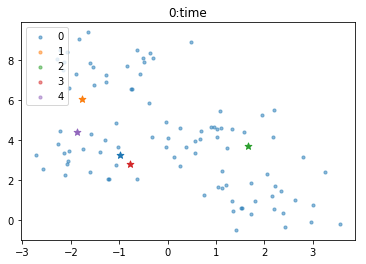

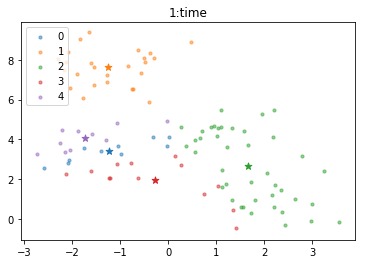

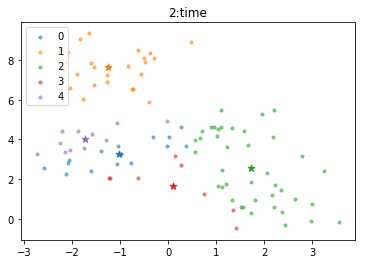

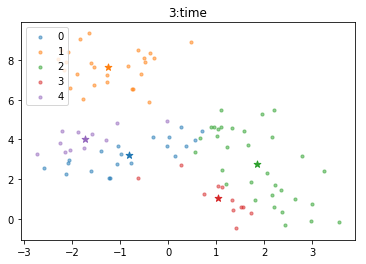

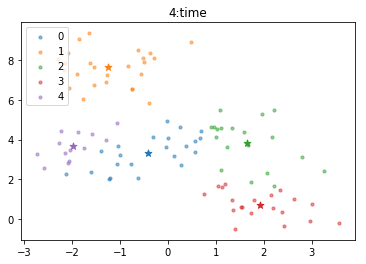

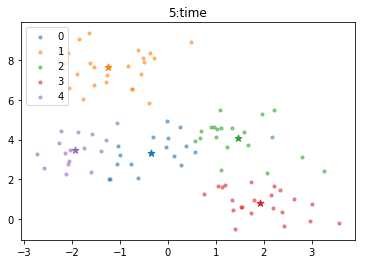

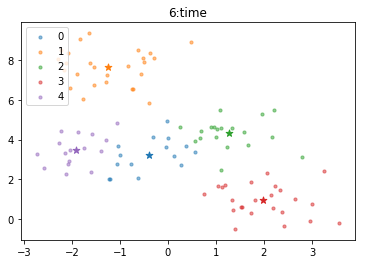

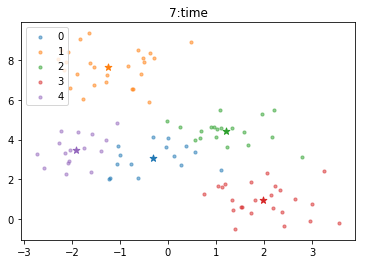

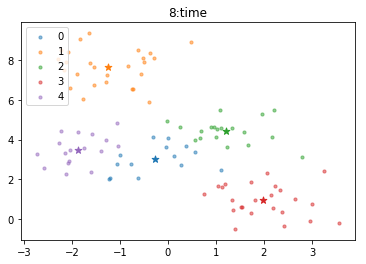

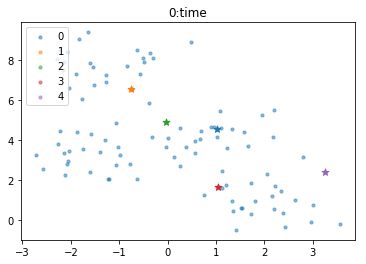

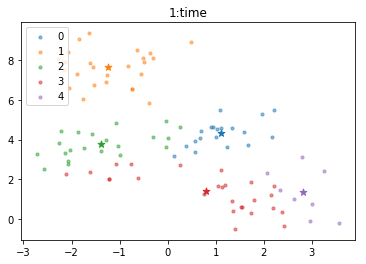

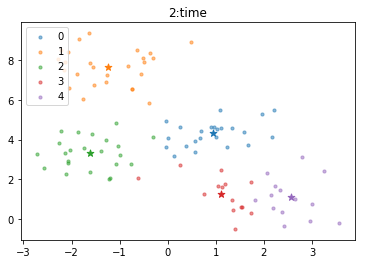

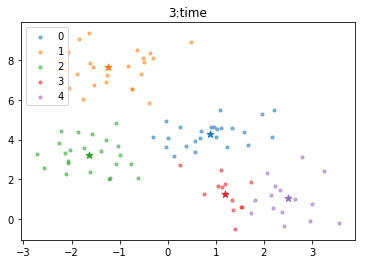

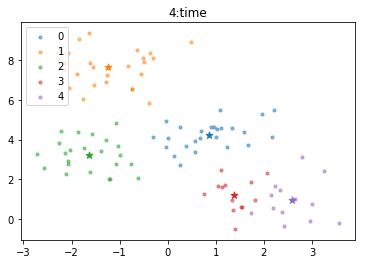

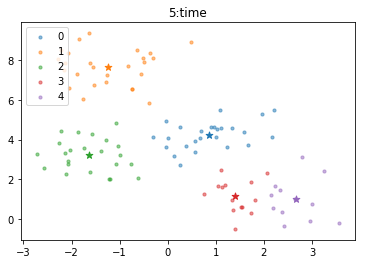

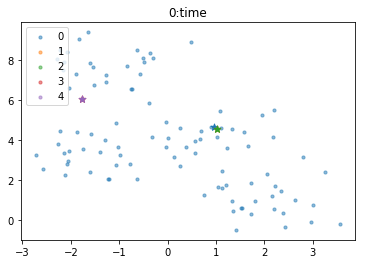

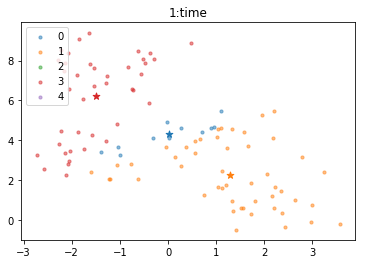

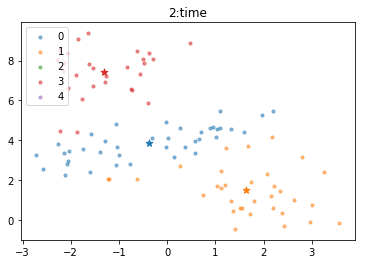

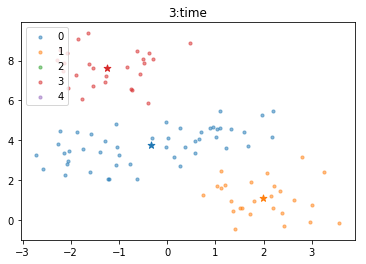

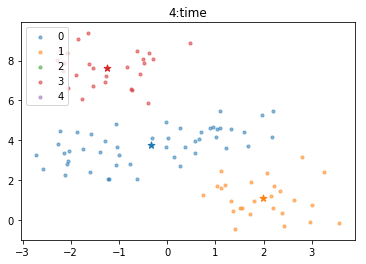

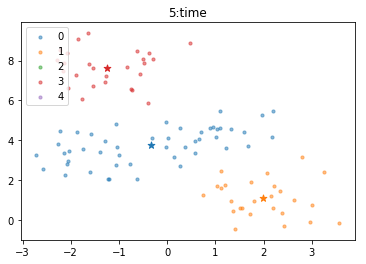

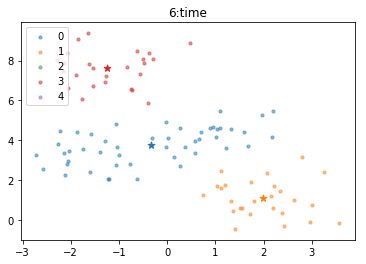

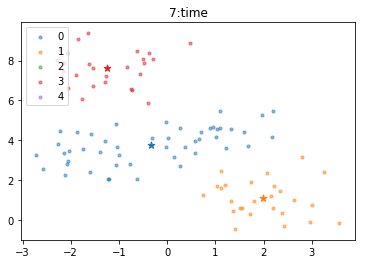

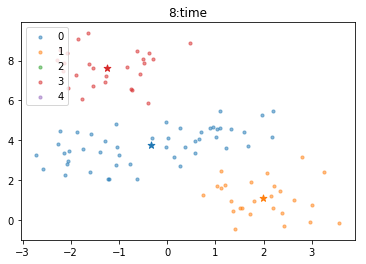

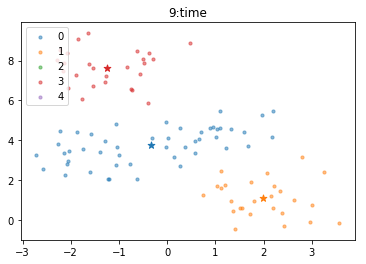

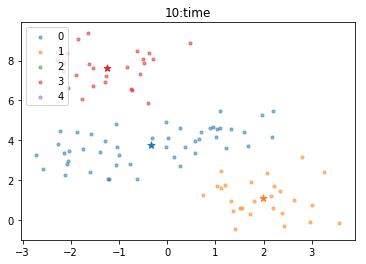

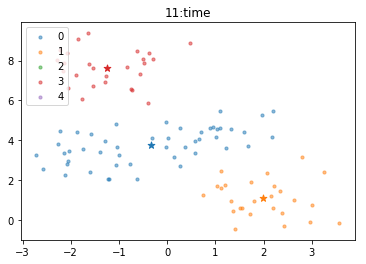

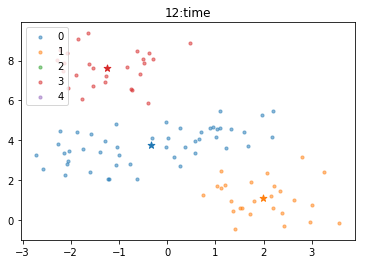

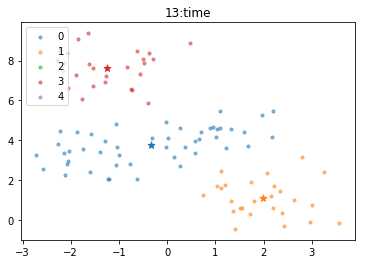

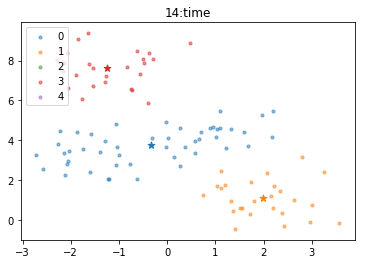

In [278]:
skm_3 = ScratchKMeans(n_clusters=5, n_init=3, max_iter=15, verbose=True)
skm_3.fit(X)

In [279]:
skm_3.predict(X)

array([0, 1, 2, 2, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 4, 3, 2, 1,
       4, 3, 2, 4, 0, 2, 3, 3, 3, 1, 3, 3, 4, 2, 1, 3, 1, 4, 2, 4, 1, 4,
       4, 1, 3, 4, 2, 0, 2, 3, 0, 4, 0, 1, 1, 3, 3, 1, 1, 3, 3, 2, 3, 1,
       4, 0, 3, 2, 1, 3, 2, 1, 2, 2, 0, 4, 3, 3, 3, 1, 4, 0, 3, 0, 3, 3,
       2, 2, 2, 0, 0, 0, 4, 1, 1, 4, 1, 4])

## 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 $k$ は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 $k$ を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 $k$ を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

In [283]:
sse_array = np.zeros(30)
for i in range(1, 31):
    skm_el_1 = ScratchKMeans(n_clusters=i, n_init=3, max_iter=15, verbose=False)
    skm_el_1.fit(X)
    sse_array[i - 1] = skm_el_1.best_sse
    

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: Mean of empty slice.
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


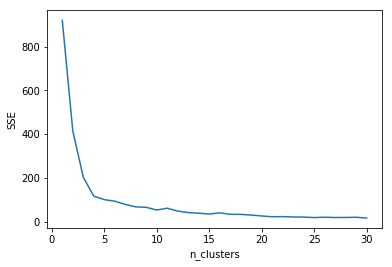

In [284]:
# 折れ線グラフを出力
trans_x = np.array(range(1, 31))
trans_y = sse_array
plt.xlabel("n_clusters")
plt.ylabel("SSE")
plt.plot(trans_x, trans_y)
plt.show()

## 【問題9】（アドバンス課題）シルエット図
$k$ を決める助けになるものとしてシルエット図もあります。シルエット図を表示するコードを作成してください。


Matplotlibを使い図を表示するコードは用意しました。以下を与えてください。


silhouette_vals : shape(n_samples,)のndarray、各データ点のシルエット係数


silhouette_avg : float、シルエット係数の平均値


y_km : shape(n_samples,)のndarray、各データ点のクラスタラベル名


cluster_labels : list、クラスタのラベル名のリスト


n_clusters : int、クラスタ数


$n$ 番目のデータ点に対するシルエット係数 $s_n$ は以下の数式でを求められます。この数式を実装し、シルエット図を確認してください。

$$
s_n = \frac{b_n-a_n}{max(b_n,a_n)}
$$

$a_n$ : 凝集度。同じクラスタ内の他のデータ点との距離の平均値。


$b_n$ : 乖離度。最も近い他のクラスタ内の全てのデータ点との距離の平均値。


乖離度 $b$ が大きく、凝集度 $a$ が小さい時が理想的であり、シルエット係数 $s$ は1に近くなります。



In [347]:
c1 = np.array([[1, 2],
     [1, 3],
     [1, 4]])

In [348]:
# 総当りの距離
np.linalg.norm(c1 - c1[:, np.newaxis], axis=2)

array([[0., 1., 2.],
       [1., 0., 1.],
       [2., 1., 0.]])

In [423]:
skm_si_1 = ScratchKMeans(n_clusters=4, n_init=3, max_iter=15, verbose=False)
skm_si_1.fit(X)

array([2, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 3, 0, 2, 1,
       3, 0, 2, 3, 2, 2, 0, 0, 0, 1, 0, 0, 3, 2, 1, 0, 1, 3, 2, 3, 1, 3,
       3, 1, 0, 3, 2, 2, 2, 0, 3, 3, 3, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1,
       3, 3, 0, 2, 1, 0, 2, 1, 2, 2, 2, 3, 0, 0, 0, 1, 3, 2, 0, 3, 0, 0,
       2, 2, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3])

In [431]:
# 総当りの距離
#X_mat = np.linalg.norm(X - X[:, np.newaxis], axis=2,ord=2)
X_mat = np.linalg.norm(X - X[:, np.newaxis], axis=2)
X_mat

array([[0.        , 5.48797385, 1.45626114, ..., 2.34142747, 4.85268394,
        2.19599551],
       [5.48797385, 0.        , 5.31661179, ..., 3.82533083, 1.77145506,
        3.44436605],
       [1.45626114, 5.31661179, 0.        , ..., 3.16859784, 4.24347316,
        2.68515832],
       ...,
       [2.34142747, 3.82533083, 3.16859784, ..., 0.        , 3.94956732,
        0.74511158],
       [4.85268394, 1.77145506, 4.24347316, ..., 3.94956732, 0.        ,
        3.31053742],
       [2.19599551, 3.44436605, 2.68515832, ..., 0.74511158, 3.31053742,
        0.        ]])

In [432]:
center_mat = np.linalg.norm(skm_si_1.best_centroids - skm_si_1.best_centroids[:, np.newaxis], axis=2)

print(center_mat)
print(sorted(center_mat[0])[1])

[[0.         7.37338227 3.35204905 4.22603939]
 [7.37338227 0.         4.07993911 4.43524073]
 [3.35204905 4.07993911 0.         2.74558705]
 [4.22603939 4.43524073 2.74558705 0.        ]]
3.352049046302315


In [433]:
near_c_list = []
for i in range(len(skm_si_1.best_centroids)):
    near_c = np.array(range(len(skm_si_1.best_centroids)))
    # ソートして小さい方から2番目を取る（自分自身の0は抜かす）
    near_c_list.append(near_c[center_mat[i] == sorted(center_mat[i])[1]])
near_c_nd = np.array(near_c_list)
near_c_nd

array([[2],
       [2],
       [3],
       [2]])

In [448]:
silhouette_nd = np.zeros(X.shape[0])
for i, c in enumerate(skm_si_1.best_cluster):
    idx = skm_si_1.best_cluster==c
    same_a = sum(X_mat[idx, i])
    #print("X_mat[idx, i]", X_mat[idx, i])
    # 中心の座標が一番近い他のクラスター全てとの距離の和
    idx_diff = skm_si_1.best_cluster==near_c_nd[c][0]
    #print("sorted(X_mat[i, :])", sorted(X_mat[i, :])[1])
    #print("argsort(X_mat[i, :])[1]) ", np.argsort(X_mat[i, :])[1])
    #diff_idx_i = np.argsort(X_mat[i, :])[1]
    #print("skm_si_1.best_cluster[diff_idx_i]", skm_si_1.best_cluster[diff_idx_i])
    #dx_diff = skm_si_1.best_cluster==skm_si_1.best_cluster[diff_idx_i]
    #print("idx_diff", idx_diff)
    diff_b = sum(X_mat[idx_diff, i])
    
    #print("X_mat[idx_diff, i]", X_mat[idx_diff, i])
    #print(diff_b)
    silhouette_nd[i] = (diff_b - same_a) / max(diff_b, same_a)
silhouette_nd

array([0.41462328, 0.71858403, 0.64313841, 0.65764588, 0.55712917,
       0.59615644, 0.58979881, 0.68720172, 0.06390824, 0.74954558,
       0.49579089, 0.59421656, 0.65782576, 0.71803118, 0.64250517,
       0.60559801, 0.1078033 , 0.43953549, 0.73307014, 0.66335131,
       0.42908129, 0.7102377 , 0.72958602, 0.6762321 , 0.48209899,
       0.67753758, 0.33749912, 0.61926931, 0.33456358, 0.66731373,
       0.71959613, 0.50216897, 0.73499949, 0.3590277 , 0.53347548,
       0.5778765 , 0.66531786, 0.53494472, 0.52298053, 0.68072127,
       0.52968766, 0.66801215, 0.44853896, 0.68684031, 0.72700453,
       0.71024551, 0.69835338, 0.7255591 , 0.5587906 , 0.06255718,
       0.34107279, 0.72505629, 0.61094567, 0.58177362, 0.45600709,
       0.71183961, 0.69502435, 0.69166755, 0.65559802, 0.66240226,
       0.63241145, 0.51303685, 0.7009548 , 0.51918429, 0.50360311,
       0.67119871, 0.68659008, 0.59543939, 0.61145545, 0.65587218,
       0.72614494, 0.53775632, 0.64131523, 0.75385135, 0.64833

In [436]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_avg = silhouette_score(X,  skm_si_1.best_cluster)
silhouette_samples = silhouette_samples(X,  skm_si_1.best_cluster)
print("silhouette_samples", silhouette_samples)
print("sklearn silhouette_avg", silhouette_avg)
print("mean", np.mean(silhouette_samples))

silhouette_samples [0.46145341 0.69618763 0.66825147 0.68503421 0.58043845 0.62846393
 0.51521677 0.67468979 0.02646457 0.7395274  0.47562253 0.52082419
 0.64413879 0.70675243 0.62820537 0.57273118 0.03345358 0.48437265
 0.68453744 0.63529725 0.02966454 0.68032444 0.68041984 0.64925145
 0.52353107 0.61890805 0.39049919 0.64972777 0.27911054 0.63958987
 0.69622914 0.48225573 0.71291611 0.30561334 0.44865284 0.58321939
 0.65193058 0.49619012 0.50389975 0.62267059 0.52793495 0.60765072
 0.3314997  0.62990218 0.677369   0.69502222 0.67321616 0.67566075
 0.59408735 0.13755261 0.39378696 0.70214431 0.54020852 0.50573246
 0.35709929 0.7003132  0.68282532 0.66597318 0.62689785 0.64889835
 0.60993828 0.47245659 0.67603436 0.52033757 0.46223671 0.65804666
 0.62960646 0.52188292 0.57907674 0.6834024  0.71436048 0.49923602
 0.67001001 0.7440054  0.67646978 0.53273788 0.26268887 0.65119331
 0.69952181 0.49466614 0.61039702 0.67735428 0.48047019 0.17315273
 0.69911435 0.42419935 0.65697157 0.6986951

In [443]:
from matplotlib import cm
def plot_silhouette(silhouette_vals, y_km, cluster_labels, n_clusters):
    silhouette_avg = np.mean(silhouette_vals)
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    #plt.yticks(yticks, cluster_labels + 1)
    plt.yticks(yticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

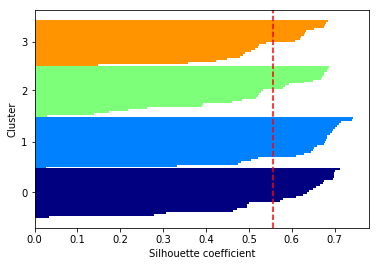

In [444]:
# sklearn
plot_silhouette(silhouette_samples, skm_si_1.best_cluster, [0, 1, 2, 3], 4)

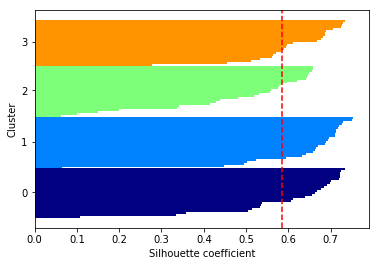

In [445]:
# 自作
plot_silhouette(silhouette_nd, skm_si_1.best_cluster, [0, 1, 2, 3], 4)

シルエット係数がsklearnと完全一致とはならなかったが、時間をかけすぎてしまったので、アドバンス問題ということもあり一度飛ばします<br>
高速化のために、距離の総当りなどについて理解や手法を考えられたのは良かった

## 3.クラスタ分析
### 卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。


UCI Machine Learning Repository: Wholesale customers Data Set


Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。

### 次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

In [449]:
import pandas as pd
csv_path = ("Wholesale customers data.csv")
df = pd.read_csv(csv_path)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [450]:
original_df = df.copy()

In [451]:
df.drop(columns="Channel", inplace=True)
df.drop(columns="Region", inplace=True)

In [452]:
data = np.log(df)

In [453]:
#《PCAのサンプルコード》
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

[0.44237417 0.71894523 0.83511865 0.93129585 0.97705265 1.        ]


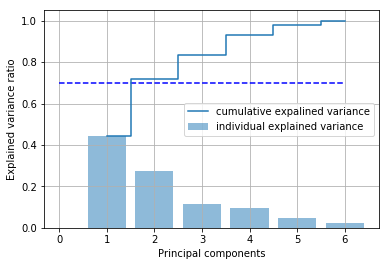

In [454]:
#《PCAの分散説明率を表示するコードサンプル》
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

### 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 $k$ を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

In [455]:
sse_array_2 = np.zeros(30)
for i in range(1, 31):
    skm_el_2 = ScratchKMeans(n_clusters=i, n_init=3, max_iter=15, verbose=False)
    skm_el_2.fit(data_pca)
    sse_array_2[i - 1] = skm_el_2.best_sse

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: Mean of empty slice.
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


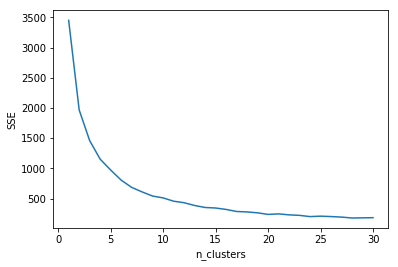

In [456]:
# 折れ線グラフを出力
trans_x = np.array(range(1, 31))
trans_y = sse_array_2
plt.xlabel("n_clusters")
plt.ylabel("SSE")
plt.plot(trans_x, trans_y)
plt.show()

In [457]:
sse_array_3 = np.zeros(10)
for i in range(1, 11):
    skm_el_3 = ScratchKMeans(n_clusters=i, n_init=3, max_iter=15, verbose=False)
    skm_el_3.fit(data_pca)
    sse_array_3[i - 1] = skm_el_3.best_sse

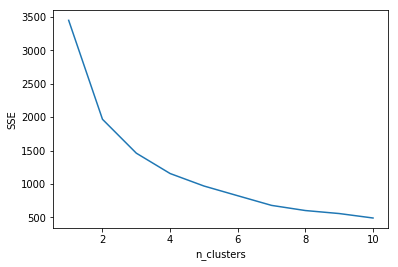

In [458]:
# 折れ線グラフを出力
trans_x = np.array(range(1, 11))
trans_y = sse_array_3
plt.xlabel("n_clusters")
plt.ylabel("SSE")
plt.plot(trans_x, trans_y)
plt.show()

エルボー法からクラスター数2~7、10をシルエット図で確認する

In [499]:
skm_si_2 = ScratchKMeans(n_clusters=2, n_init=3, max_iter=15, verbose=False)
skm_si_2.fit(data_pca)

skm_si_3 = ScratchKMeans(n_clusters=3, n_init=3, max_iter=15, verbose=False)
skm_si_3.fit(data_pca)

skm_si_4 = ScratchKMeans(n_clusters=4, n_init=3, max_iter=15, verbose=False)
skm_si_4.fit(data_pca)

skm_si_5 = ScratchKMeans(n_clusters=5, n_init=3, max_iter=15, verbose=False)
skm_si_5.fit(data_pca)

skm_si_6 = ScratchKMeans(n_clusters=6, n_init=3, max_iter=15, verbose=False)
skm_si_6.fit(data_pca)

skm_si_7 = ScratchKMeans(n_clusters=7, n_init=3, max_iter=15, verbose=False)
skm_si_7.fit(data_pca)

skm_si_10 = ScratchKMeans(n_clusters=10, n_init=3, max_iter=15, verbose=False)
skm_si_10.fit(data_pca)

array([9, 9, 9, 5, 8, 9, 9, 9, 3, 9, 9, 3, 9, 9, 9, 4, 1, 3, 9, 3, 9, 7,
       8, 6, 6, 1, 7, 7, 6, 5, 9, 3, 3, 8, 4, 1, 8, 9, 1, 5, 8, 8, 1, 1,
       1, 6, 9, 6, 9, 6, 5, 4, 9, 1, 5, 3, 6, 1, 7, 9, 1, 6, 9, 9, 3, 1,
       2, 9, 3, 4, 5, 8, 3, 8, 9, 0, 3, 6, 7, 3, 4, 1, 9, 5, 3, 6, 6, 8,
       7, 8, 7, 5, 6, 5, 1, 2, 2, 0, 0, 7, 6, 9, 9, 8, 3, 7, 1, 9, 1, 2,
       5, 9, 5, 5, 5, 7, 7, 3, 5, 7, 5, 7, 0, 3, 5, 8, 5, 9, 2, 5, 5, 0,
       3, 7, 7, 7, 9, 4, 3, 3, 8, 5, 0, 7, 4, 6, 7, 3, 7, 5, 7, 4, 7, 3,
       0, 1, 9, 5, 9, 1, 9, 0, 5, 6, 9, 6, 9, 4, 7, 7, 1, 1, 1, 1, 4, 1,
       8, 5, 7, 3, 9, 8, 1, 8, 2, 7, 7, 4, 9, 1, 7, 0, 7, 1, 7, 8, 8, 9,
       3, 4, 9, 6, 8, 2, 0, 1, 7, 1, 9, 9, 5, 6, 7, 9, 1, 9, 1, 5, 1, 0,
       7, 1, 7, 3, 7, 3, 9, 7, 4, 5, 8, 3, 5, 2, 5, 4, 7, 5, 0, 8, 8, 5,
       5, 3, 9, 1, 7, 0, 3, 3, 7, 6, 5, 3, 8, 5, 3, 3, 8, 8, 3, 7, 7, 3,
       1, 8, 1, 5, 9, 7, 7, 7, 4, 5, 4, 0, 8, 7, 5, 9, 7, 9, 8, 5, 8, 7,
       4, 5, 7, 0, 3, 7, 3, 9, 3, 4, 5, 9, 9, 2, 9,

In [485]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_avg = silhouette_score(data_pca,  skm_si_2.best_cluster)
silhouette_samples = silhouette_samples(data_pca,  skm_si_2.best_cluster)

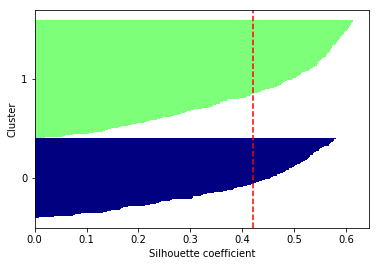

In [486]:
plot_silhouette(silhouette_samples, skm_si_2.best_cluster, list(range(2)), 2)

In [500]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_avg = silhouette_score(data_pca,  skm_si_3.best_cluster)
silhouette_samples = silhouette_samples(data_pca,  skm_si_3.best_cluster)

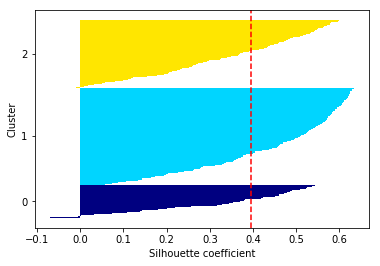

In [501]:
plot_silhouette(silhouette_samples, skm_si_3.best_cluster, list(range(3)), 3)

In [492]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_avg = silhouette_score(data_pca,  skm_si_4.best_cluster)
silhouette_samples = silhouette_samples(data_pca,  skm_si_4.best_cluster)

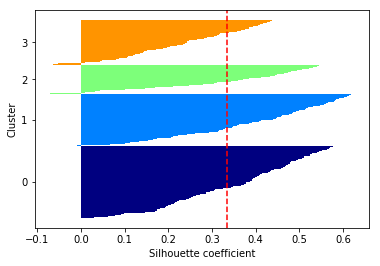

In [493]:
plot_silhouette(silhouette_samples, skm_si_4.best_cluster, list(range(4)), 4)

In [503]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_avg = silhouette_score(data_pca,  skm_si_5.best_cluster)
silhouette_samples = silhouette_samples(data_pca,  skm_si_5.best_cluster)

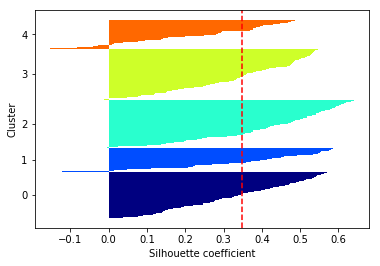

In [504]:
plot_silhouette(silhouette_samples, skm_si_5.best_cluster, list(range(5)), 5)

In [505]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_avg = silhouette_score(data_pca,  skm_si_6.best_cluster)
silhouette_samples = silhouette_samples(data_pca,  skm_si_6.best_cluster)

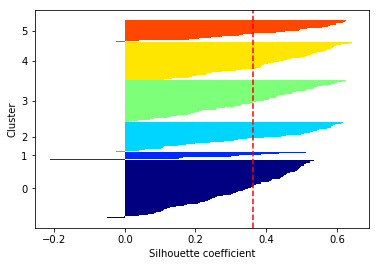

In [506]:
plot_silhouette(silhouette_samples, skm_si_6.best_cluster, list(range(6)), 6)

In [494]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_avg = silhouette_score(data_pca,  skm_si_7.best_cluster)
silhouette_samples = silhouette_samples(data_pca,  skm_si_7.best_cluster)

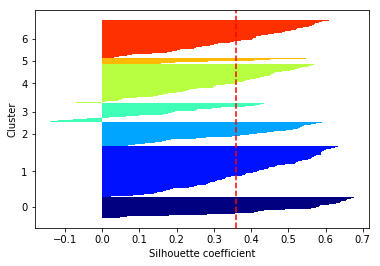

In [495]:
plot_silhouette(silhouette_samples, skm_si_7.best_cluster, list(range(7)), 7)

In [496]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_avg = silhouette_score(data_pca,  skm_si_10.best_cluster)
silhouette_samples = silhouette_samples(data_pca,  skm_si_10.best_cluster)

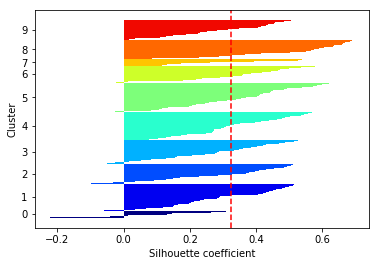

In [497]:
plot_silhouette(silhouette_samples, skm_si_10.best_cluster, list(range(10)), 10)

## 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2,

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


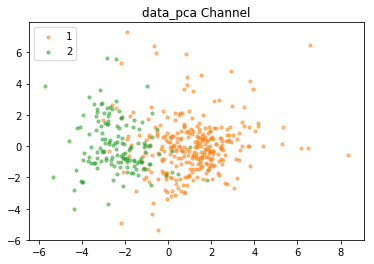

In [510]:
#可視化
col = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in np.unique(original_df["Channel"].values):
    idx = np.where(original_df["Channel"].values == i)
    ax.scatter(data_pca[idx, 0], data_pca[idx, 1], s=10, alpha=0.5, c=col[i], label=i)

ax.legend(loc='upper left')
ax.set_title("data_pca Channel")
fig.show()

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


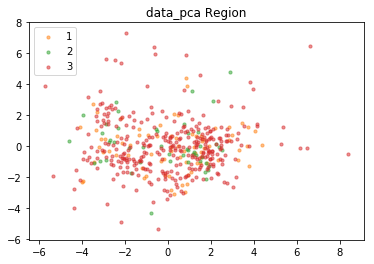

In [511]:
#可視化
col = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in np.unique(original_df["Region"].values):
    idx = np.where(original_df["Region"].values == i)
    ax.scatter(data_pca[idx, 0], data_pca[idx, 1], s=10, alpha=0.5, c=col[i], label=i)

ax.legend(loc='upper left')
ax.set_title("data_pca Region")
fig.show()

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


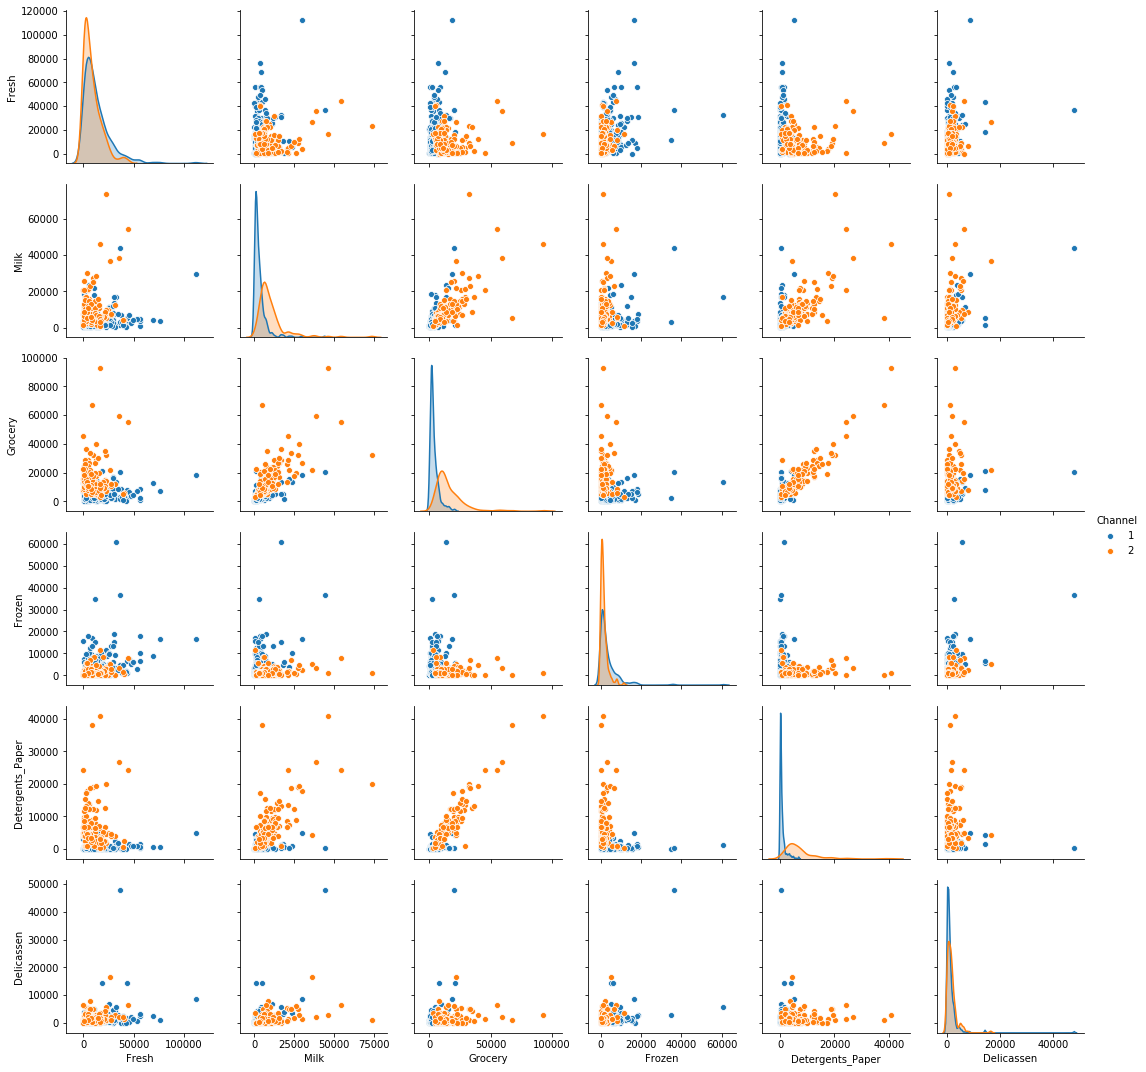

In [514]:
import seaborn as sns
sns.pairplot(original_df, vars = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"], hue = "Channel")
plt.show()

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


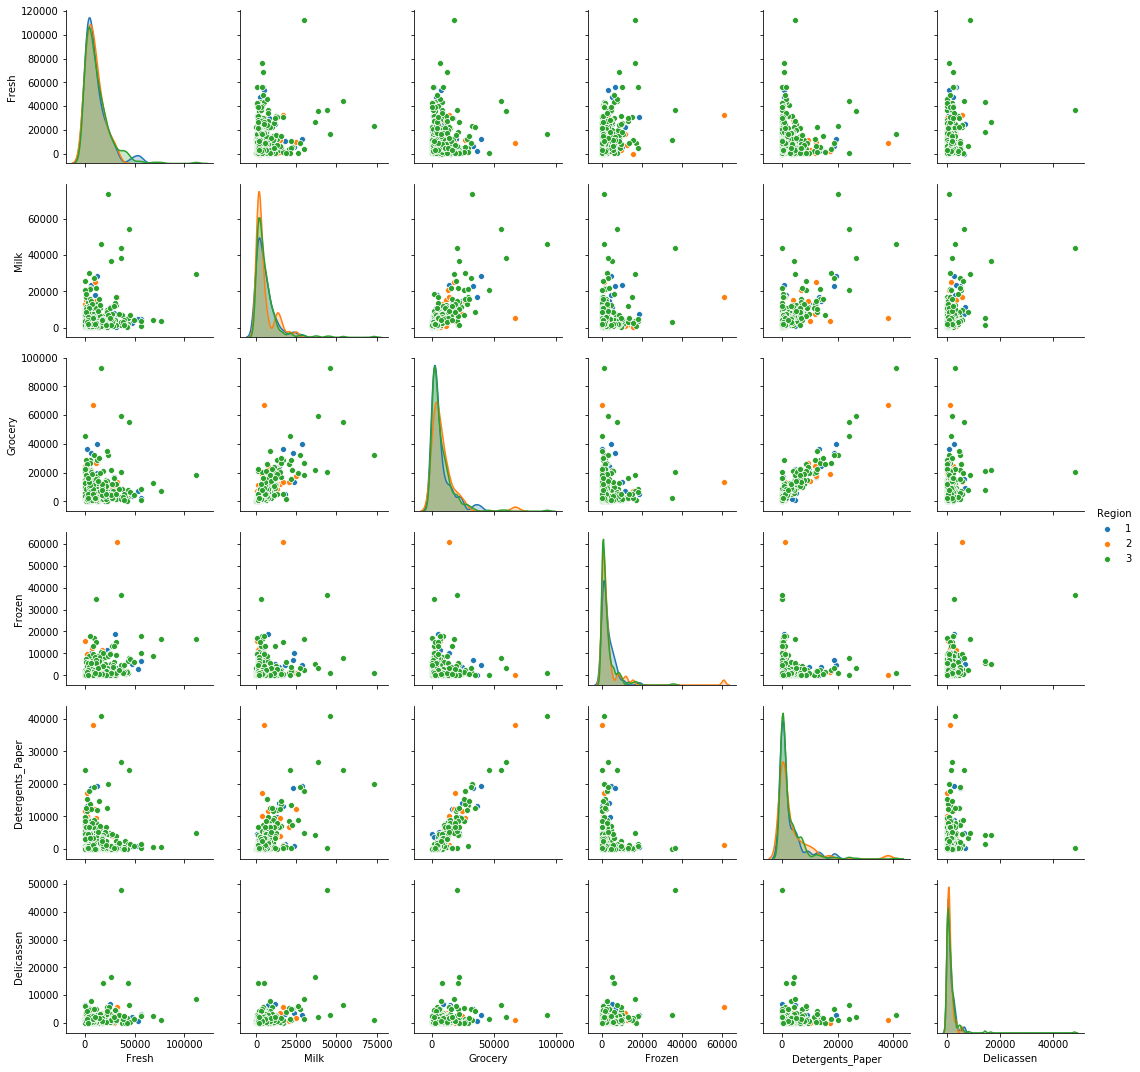

In [515]:
sns.pairplot(original_df, vars = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"], hue = "Region")
plt.show()

In [516]:
original_df.groupby(["Channel","Region"]).mean()

Fresh          Milk       Grocery       Frozen  \
Channel Region                                                          
1       1       12902.254237   3870.203390   4026.135593  3127.322034   
        2       11650.535714   2304.250000   4395.500000  5745.035714   
        3       13878.052133   3486.981043   3886.734597  3656.900474   
2       1        5200.000000  10784.000000  18471.944444  2584.111111   
        2        7289.789474   9190.789474  16326.315789  1540.578947   
        3        9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen  
Channel Region                                 
1       1             950.525424  1197.152542  
        2             482.714286  1105.892857  
        3             786.682464  1518.284360  
2       1            8225.277778  1871.944444  
        2            8410.263158  1239.000000  
        3            6899.238095  1826.209524

Channel:1 Horeca（食品業界）　2：Retail(小売業)<br>
Region：1　リスボン　2：ポルト　3：その他

ポルトの食品業者で冷凍食品をたくさん買っている層がいる
グロッサリーは小売業者がメインで購入している

In [521]:
horeca_df = original_df[original_df["Channel"]==1]
horeca_r1 = horeca_df[horeca_df["Region"]==1]
horeca_r2 = horeca_df[horeca_df["Region"]==2]
horeca_r3 = horeca_df[horeca_df["Region"]==3]
retail_df = original_df[original_df["Channel"]==2]
retail_r1 = retail_df[retail_df["Region"]==1]
retail_r2 = retail_df[retail_df["Region"]==2]
retail_r3 = retail_df[retail_df["Region"]==3]

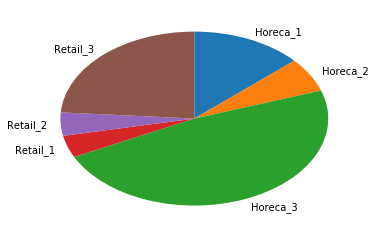

In [524]:
labels = 'Horeca_1', 'Horeca_2', 'Horeca_3', 'Retail_1', 'Retail_2', 'Retail_3'
sizes = [len(horeca_r1), len(horeca_r2), len(horeca_r3), len(retail_r1), len(retail_r2), len(retail_r3)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, counterclock=False, startangle=90)
plt.show()

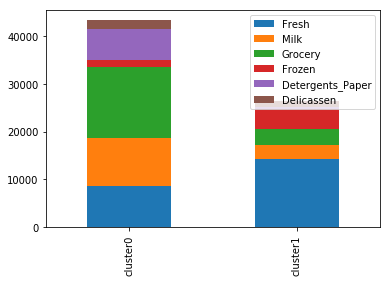

In [535]:
clusterinfo = pd.DataFrame()
for i in range(2):
    clusterinfo["cluster" + str(i)] = df[skm_si_2.best_cluster==i].mean()
clusterinfo.T.plot(kind="bar", stacked=True)

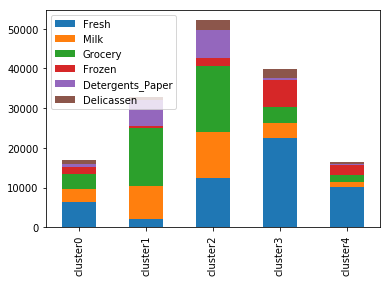

In [534]:
clusterinfo = pd.DataFrame()
for i in range(5):
    clusterinfo["cluster" + str(i)] = df[skm_si_5.best_cluster==i].mean()
clusterinfo.T.plot(kind="bar", stacked=True)

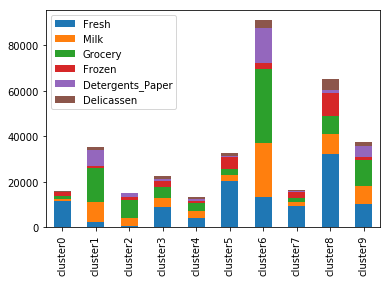

In [536]:
clusterinfo = pd.DataFrame()
for i in range(10):
    clusterinfo["cluster" + str(i)] = df[skm_si_10.best_cluster==i].mean()
clusterinfo.T.plot(kind="bar", stacked=True)

10個のクラスターに分類した時の上の表で6にあたる人たちへアンケートを取ることで更なる購買につながるかもしれない

In [538]:
#skm_si_10_plt = ScratchKMeans(n_clusters=10, n_init=3, max_iter=15, verbose=True)
#skm_si_10_plt.fit(data_pca)

## 4.他の非階層クラスタリング手法
### 【問題13】（アドバンス課題）他の手法の調査
今回扱ったK-means以外に非階層クラスタリングで有名な手法としては DBSCAN 、
PCA以外に次元削減手法で有名な手法としては t-SNE や LLE があります。


- DBSCANのメリット・デメリット
- t-SNE、LLEのメリット・デメリット

について記述してください。

【回答】
- DBSCANのメリット
> k-meansではクラスタ数を指定するが、DBCCANはクラスタ数をしてする必要がない
> ノイズという概念があるため外れ値の影響を受けない
- DBSCANのデメリット
> 計算コストが高い
> クラスタ間の密度が異なったり、データが密集している場合は不向き

- t-SNEのメリット
> t-SNEはPCAなどの可視化手法とは異なり、線形では表現できない関係も学習して次元削減を行える
- t-SNEのデメリット
> 計算コストが高い、ノイズの初期値と減退率の設定がシビア

- LLEのメリット
> 与えられたデータに対して線形結合係数を求めることで次元削減された空間を推定することが可能で
- LLEのデメリット
データの局所的な構造と大局的な構造を、同時に低次元データへと表現することが難しい

### 【問題14】（アドバンス課題）t-SNEとDBSCANの利用
Wholesale customersのデータに対して、PCAではなく、 t-SNE を用いて次元削減をしてください。さらにK-meansではなく、 DBSCAN を用いてクラスタリングしてください。


そのクラスタリング結果をPCA+kmeansの場合の結果と比較してみましょう。実装にはscikit-learnを用いてください。

sklearn.manifold.TSNE — scikit-learn 0.20.2 documentation


sklearn.cluster.DBSCAN — scikit-learn 0.20.2 documentation

《パラメーターチューニング》


これらはK-meansやPCAに比べパラメーターチューニングが難しい手法です。scikit-learnのドキュメントと共に論文も参考にしながらパラメータの意味を確認することも大切になります。


t-SNEの論文


DBSCANの論文

目次
Sprint 機械学習スクラッチ クラスタリング

1.このSprintについて
2.K-meansスクラッチ
3.クラスタ分析
4.他の非階層クラスタリング手法

In [539]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(data)
X_embedded.shape

(440, 2)

In [554]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=2, min_samples=4).fit(X_embedded)
clustering.labels_

array([ 0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  2,  0,
        3,  0,  0,  0,  1,  1, -1, -1,  4,  1,  1,  0,  8,  0,  3,  2,  1,
        3,  0,  0,  0,  0,  1,  1,  0,  4,  0,  4,  0,  0,  0,  0,  0,  5,
        4,  0,  0,  1,  0,  0,  0,  1,  0,  4,  0,  0,  0,  5,  0,  0,  0,
       -1,  1,  1,  0, -1,  1,  0,  1,  5,  0,  1,  3,  2,  0,  0,  1,  0,
        0,  0, -1, -1,  1,  1,  1,  0,  1,  4,  0,  0,  6,  6,  1,  0,  0,
        0,  1,  0,  1,  0,  0,  0,  7,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  0,  7,  1,  1,  6,  2,  1,  1,  1,
        0,  7, -1,  2,  0,  1, -1,  1,  2,  0,  1,  2,  1,  1,  1,  3,  1,
        3,  6,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0, -1,  1,  1,
        0,  0,  0,  0,  3,  0,  1,  1,  1, -1,  0, -1,  0,  1,  7,  1,  1,
        7,  0,  0, -1,  1,  1,  0,  1,  1,  1,  0,  1,  2,  0,  0,  1,  7,
        1, -1,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  0,  1,  1,
        4,  1,  5,  1,  2

In [555]:
labels = clustering.labels_ +1

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


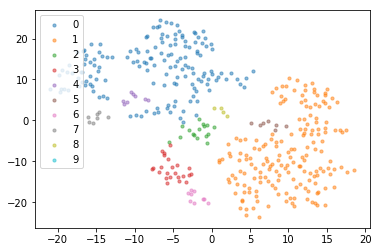

In [556]:
#可視化
col = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in np.unique(labels):
    idx = np.where(clustering.labels_ == i)
    ax.scatter(X_embedded[idx, 0], X_embedded[idx, 1], s=10, alpha=0.5, c=col[i], label=i)
ax.legend(loc='upper left')
fig.show()